In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

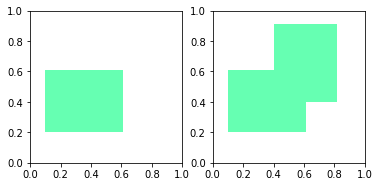

In [5]:
rect0 = Rectangle(0.1, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.8, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Progressive Experiments

In [7]:
def run_progressive_experiment(epochs, progressive):
  exp = Experiment('rectangles', NeuralNetwork(), shapes, constraints1)
  exp.run(epochs, 'cpu', progressive=progressive)
  return exp

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.863135 [    0/ 1000]
Test Error: 
 Accuracy: 66.0%, 40.0%
 Avg loss: 0.013954 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.705271 [    0/ 1000]
Test Error: 
 Accuracy: 81.0%, 60.0%
 Avg loss: 0.012403 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.586964 [    0/ 1000]
Test Error: 
 Accuracy: 81.0%, 60.0%
 Avg loss: 0.011911 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.529065 [    0/ 1000]
Test Error: 
 Accuracy: 81.0%, 60.0%
 Avg loss: 0.011756 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.515493 [    0/ 1000]
Test Error: 
 Accuracy: 81.0%, 60.0%
 Avg loss: 0.011672 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.514992 [    0/ 1000]
Test Erro

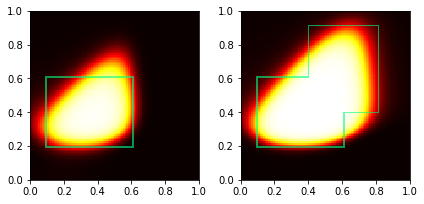

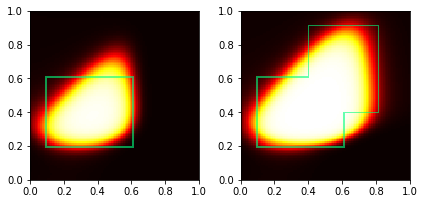

In [18]:
run_progressive_experiment(1000, 0.)

In [19]:
run_progressive_experiment(1000, 0.1)

Epoch 1, Ratio 0.01
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.546047 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 63.0%
 Avg loss: 0.011650 

Epoch 2, Ratio 0.02
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.476587 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 63.0%
 Avg loss: 0.011852 

Epoch 3, Ratio 0.03
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.471316 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 63.0%
 Avg loss: 0.011861 

Epoch 4, Ratio 0.04
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.470848 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 63.0%
 Avg loss: 0.011755 

Epoch 5, Ratio 0.049999999999999996
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.466719 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 63.0%
 Avg loss: 0.011710 

Epoch 6, Ratio 0.06
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.464685 [    0/ 1000]
Test 

Epoch 1, Ratio 0.013333333333333334
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.547403 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 38.0%
 Avg loss: 0.013595 

Epoch 2, Ratio 0.02666666666666667
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.464981 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 38.0%
 Avg loss: 0.013646 

Epoch 3, Ratio 0.04
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.452526 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 38.0%
 Avg loss: 0.013526 

Epoch 4, Ratio 0.05333333333333334
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.453731 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 38.0%
 Avg loss: 0.013438 

Epoch 5, Ratio 0.06666666666666667
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.453850 [    0/ 1000]
Test Error: 
 Accuracy: 78.0%, 38.0%
 Avg loss: 0.013375 

Epoch 6, Ratio 0.08
-----------------------
Created slicer for 0 modules (

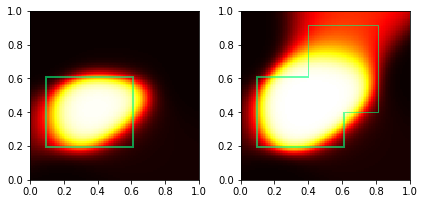

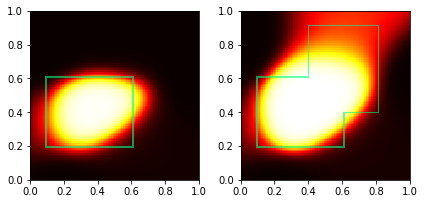

In [ ]:
run_progressive_experiment(1000, 0.25)

Epoch 1, Ratio 0.011111111111111112
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.597883 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 68.0%
 Avg loss: 0.011620 

Epoch 2, Ratio 0.022222222222222223
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.502806 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 68.0%
 Avg loss: 0.011225 

Epoch 3, Ratio 0.03333333333333333
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.472344 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 68.0%
 Avg loss: 0.011150 

Epoch 4, Ratio 0.044444444444444446
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.468607 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 68.0%
 Avg loss: 0.011119 

Epoch 5, Ratio 0.05555555555555556
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.466643 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 68.0%
 Avg loss: 0.011084 

Epoch 6, Ratio 0.06666666666666667
----------------------

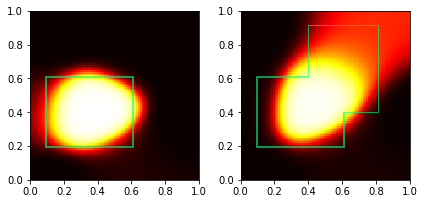

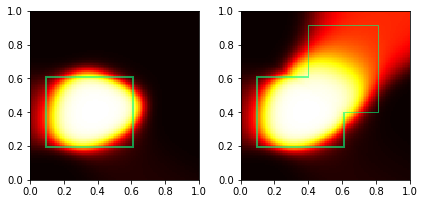

In [12]:
run_progressive_experiment(1000, 0.3)

Epoch 1, Ratio 0.002
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.795218 [    0/ 1000]
Test Error: 
 Accuracy: 73.0%, 41.0%
 Avg loss: 0.013149 

Epoch 2, Ratio 0.004
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.567159 [    0/ 1000]
Test Error: 
 Accuracy: 73.0%, 42.0%
 Avg loss: 0.012587 

Epoch 3, Ratio 0.006
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.440444 [    0/ 1000]
Test Error: 
 Accuracy: 73.0%, 40.0%
 Avg loss: 0.012459 

Epoch 4, Ratio 0.008
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.362868 [    0/ 1000]
Test Error: 
 Accuracy: 73.0%, 37.0%
 Avg loss: 0.012532 

Epoch 5, Ratio 0.01
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.335775 [    0/ 1000]
Test Error: 
 Accuracy: 73.0%, 40.0%
 Avg loss: 0.012499 

Epoch 6, Ratio 0.012
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.333074 [    0/ 1000]
Test Error: 
 Ac

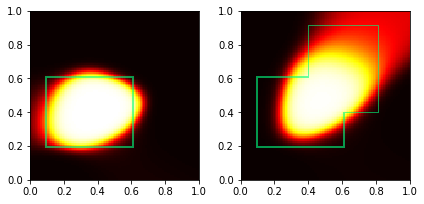

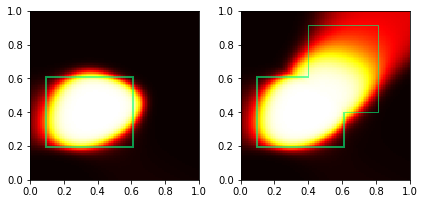

In [16]:
run_progressive_experiment(1000, 0.5)

Epoch 1, Ratio 0.0044444444444444444
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.766136 [    0/ 1000]
Test Error: 
 Accuracy: 76.0%, 33.0%
 Avg loss: 0.013504 

Epoch 2, Ratio 0.008888888888888889
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.575662 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 33.0%
 Avg loss: 0.012737 

Epoch 3, Ratio 0.013333333333333334
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.496938 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 33.0%
 Avg loss: 0.012615 

Epoch 4, Ratio 0.017777777777777778
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.484462 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 33.0%
 Avg loss: 0.012606 

Epoch 5, Ratio 0.022222222222222223
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.481680 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 33.0%
 Avg loss: 0.012609 

Epoch 6, Ratio 0.02666666666666667
-------------------

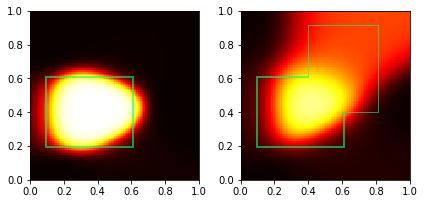

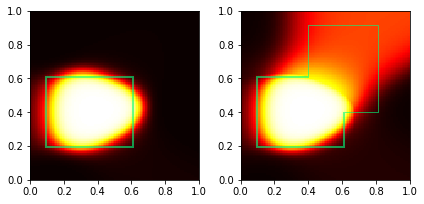

In [14]:
run_progressive_experiment(300, 0.75)

Epoch 1, Ratio 0.001
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.797062 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 63.0%
 Avg loss: 0.012821 

Epoch 2, Ratio 0.002
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.626579 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 63.0%
 Avg loss: 0.011725 

Epoch 3, Ratio 0.003
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.544016 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 63.0%
 Avg loss: 0.011463 

Epoch 4, Ratio 0.004
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.535390 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 63.0%
 Avg loss: 0.011449 

Epoch 5, Ratio 0.005
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.541934 [    0/ 1000]
Test Error: 
 Accuracy: 83.0%, 63.0%
 Avg loss: 0.011444 

Epoch 6, Ratio 0.006
-----------------------
Created slicer for 0 modules (atoms {0})
loss: 0.541186 [    0/ 1000]
Test Error: 
 A

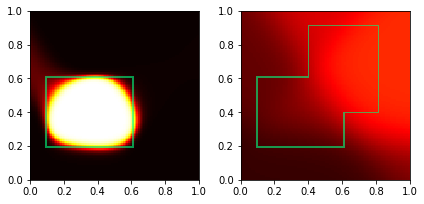

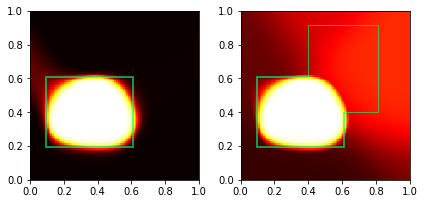

In [17]:
run_progressive_experiment(1000, 1.0)

### Train and test the model

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.556877 [    0/ 1000]
Test Error: 
 Accuracy: 82.0%, 62.0%
 Avg loss: 0.010363 

Done!


AttributeError: 'AxesImage' object has no property 'cbarlabel'

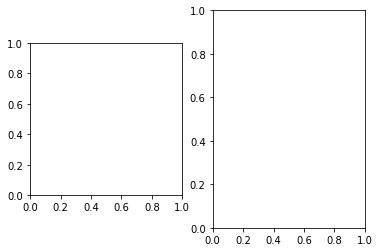

In [5]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(1, 'cpu', progressive=0)
#experiment.save(dir='./models/')

# for param in model1.parameters():
#   print(param.grad)
#   print(param.grad.data)
#   print(param.grad.data.norm(2).item())
  

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
loss: 0.163656 [    0/ 1000]
Test Error: 
 Accuracy: 98.0%, 96.0%
 Avg loss: 0.001675 

Done!


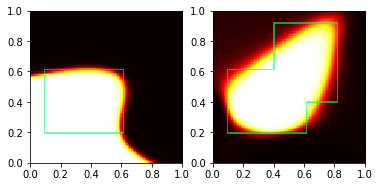

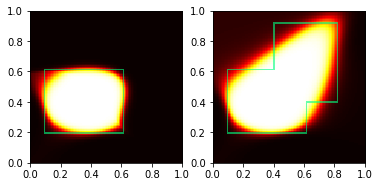

In [15]:
experiment2 = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment2.run(1, 'cpu')
#experiment.save(dir='./models/')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.846940 [    0/ 1000]
Test Error: 
 Accuracy: 54.0%, 61.0%
 Avg loss: 0.013694 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.661737 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 62.0%
 Avg loss: 0.012177 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.557419 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 62.0%
 Avg loss: 0.011715 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.525782 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 62.0%
 Avg loss: 0.011651 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.521790 [    0/ 1000]
Test Error: 
 Accuracy: 77.0%, 62.0%
 Avg loss: 0.011628 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 0 modules (atoms {0, 1})
loss: 0.520143 [    0/ 1000]
Test Erro

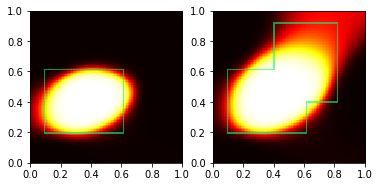

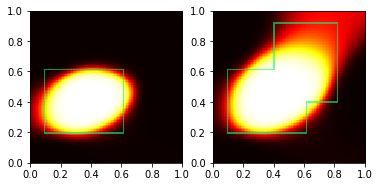

In [12]:
model3 = NeuralNetwork()
experiment3 = Experiment('plain', model3, shapes, [])
experiment3.run(1000, 'cpu')
#experiment.save(dir='./models/')

In [13]:
experiment.save(dir='./models/')
experiment2.save(dir='./models/')
experiment3.save(dir='./models/')